In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.linalg import eig

# Exercise 1

## Point 1

In [3]:
iris_dataset = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
iris = iris_dataset.to_numpy()

In [4]:
iris = iris_dataset.to_numpy()
Xi1 = iris[:,1]
Xj1 = iris[:,2]

example1 = np.array([Xi1,Xj1]).astype(float)
cov1 = np.cov(example1)
eigVals1, eigVecs1 = eig(cov1)

print(eigVals1)

[0.15303977+0.j 3.14814368+0.j]


In [5]:
iris = iris_dataset.to_numpy()
Xi2 = iris[:,1]
Xj2 = iris[:,2]
Xi2[0] = Xi2[0] * 3
Xj2[0] = Xj2[0] * 3

example2 = np.array([Xi2,Xj2]).astype(float)
cov2 = np.cov(example2)
eigVals2, eigVecs2 = eig(cov2)

print(eigVals2)

[0.52285345+0.j 3.1105215 +0.j]


In [6]:
ans = eigVecs1 == eigVecs2
print("Are the principal components equal after transforming one column (We multiplied column 0 by 3)? " + str(ans))

Are the principal components equal after transforming one column (We multiplied column 0 by 3)? [[False False]
 [False False]]


## Point 2

In [7]:
# Closest we can get to a dataset for which both its covariance matrix and its correlation matrix are exactly the same
dataset = [[-1.2649111,-0.6324555,0,0.6324555,1.2649111],[-1.2649111,-0.6324555,0,0.6324555,1.2649111]]
cov3 = np.cov(dataset)
cor = np.corrcoef(dataset)

eigVals3, eigVecs3 = eig(cor)
print(eigVecs3)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [8]:
# We apply the affine transformation 2 * D_ij + 1 to dataset D, column 1
affinely_transformed_dataset = dataset
affinely_transformed_dataset[0][0] = affinely_transformed_dataset[0][0] * 2 + 1 
affinely_transformed_dataset[1][0] = affinely_transformed_dataset[1][0] * 2 + 1 
print(affinely_transformed_dataset)

cov4 = np.cov(dataset)
cor2 = np.corrcoef(dataset)

eigVals4, eigVecs4 = eig(cor2)
print(eigVecs4)

[[-1.5298222, -0.6324555, 0, 0.6324555, 1.2649111], [-1.5298222, -0.6324555, 0, 0.6324555, 1.2649111]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [9]:
ans = eigVecs3 == eigVecs4
print("Are the principal components of a dataset for which its covariance and correlation matrix are equal after we apply an affine transformation to its columns? " + str(ans))

Are the principal components of a dataset for which its covariance and correlation matrix are equal after we apply an affine transformation to its columns? [[ True  True]
 [ True  True]]


# Exercise 2

## Point #1

In [10]:
df_iris = pd.read_csv("iris.csv")
df_baseball_numeric = pd.read_csv("baseball_numeric.csv")
df_fabert = pd.read_csv("fabert.csv")
df_amazon = pd.read_csv("amazon.csv")

In [11]:
#keep only numeric variables
df_iris = df_iris.drop(['species'], axis=1)
df_fabert = df_fabert.drop(['class'], axis=1)
df_amazon = df_amazon.drop(['Class'], axis=1)

In [12]:
#Accelerate the execution time for amazon
data_centralizada = df_amazon - np.mean(df_amazon, axis=0)
cov_matrix = np.cov(data_centralizada, rowvar=False)
eigenvalues_amazon, eigenvectors_amazon = np.linalg.eig(cov_matrix)

In [ ]:
def PCA(D, red):
    
    data_centralizada = D - np.mean(D, axis=0)
    
    # Matriz covarianza
    cov_matrix = np.cov(data_centralizada, rowvar=False)
    
    # Eigenvalores de la matriz
    if len(D) == 1500:
        eigenvalues = eigenvalues_amazon
        eigenvectors = eigenvectors_amazon
    else:
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalues = abs(eigenvalues)
    
    # Ordenar los más importantes
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    #Determinar el número de dimensiones a retener en función de la fracción de varianza
    total_variance = np.sum(eigenvalues)
    if red < 1:
        retained_variance = red * total_variance
        cum_variance = np.cumsum(eigenvalues)
        num_dimensions = np.argmax(cum_variance >= retained_variance) + 1
    elif isinstance(red, int) and red >= 1:
        # Usar los que de red
        num_dimensions = red
    else:
        raise ValueError("Valor inválido, recuerde que debe ser entero positivo.")    
    
    # Usar los mayores de 'num_dimensions' eigenvectors
    selected_eigenvectors = eigenvectors[:, :num_dimensions]
    
    # Datos reducidos (producto punto)
    reduced_data = np.dot(data_centralizada, selected_eigenvectors)
    
    # Varianza mantenida en los datos reducidos
    #Varianza mantenida= Suma de todos los valores propios/Suma de los primeros k valores propios
    new_variance = np.sum(eigenvalues[:num_dimensions])
    kept_percentage = new_variance / total_variance
    
    return reduced_data, new_variance, kept_percentage

## Point #2

### Item A


In [ ]:
reduced_iris1, reduced_variance_iris1, kept_percentage_iris1 = PCA(df_iris, 0.9)
reduced_baseball_numeric1, reduced_variance_baseball_numeric1, kept_percentage_numeric1 = PCA(df_baseball_numeric, 0.9)
reduced_fabert1, reduced_variance_fabert1, kept_percentage_fabert1 = PCA(df_fabert, 0.9)
reduced_amazon1, reduced_variance_amazon1, kept_percentage_amazon1 = PCA(df_amazon, 0.9)

In [ ]:
data = np.array([['Iris Dataset',len(reduced_iris1[0]), reduced_variance_iris1/kept_percentage_iris1, reduced_variance_iris1, kept_percentage_iris1*100],
                ['Baseball Dataset',len(reduced_baseball_numeric1[0]), reduced_variance_baseball_numeric1/kept_percentage_numeric1, reduced_variance_baseball_numeric1, kept_percentage_numeric1*100],
                ['Fabert Dataset',len(reduced_fabert1[0]), reduced_variance_fabert1/kept_percentage_fabert1, reduced_variance_fabert1, kept_percentage_fabert1*100],
                ['Amazon Dataset',len(reduced_amazon1[0]), reduced_variance_amazon1/kept_percentage_amazon1, reduced_variance_amazon1, kept_percentage_amazon1*100]])

df = pd.DataFrame(data=data.real, columns=['Dataset','Número de columnas', 'Varianza original', 'Varianza reducida', 'Porcentaje mantenido'])
df

,Dataset,Número de columnas,Varianza original,Varianza reducida,Porcentaje mantenido
0,Iris Dataset,1,4.569291275167783,4.224840768320111,92.46162071742681
1,Baseball Dataset,2,17412.91996725617,17228.155685720725,98.9389241902973
2,Fabert Dataset,516,2.7866225874136514,2.5090248447354497,90.03820094145406
3,Amazon Dataset,197,13503.860974872168,12155.426522811416,90.0144524994007


### Item B


C:\Users\FAMILIA\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\FAMILIA\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\FAMILIA\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
C:\Users\FAMILIA\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
C:\Users\FAMILIA\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:389: ComplexWarning: Casting complex 

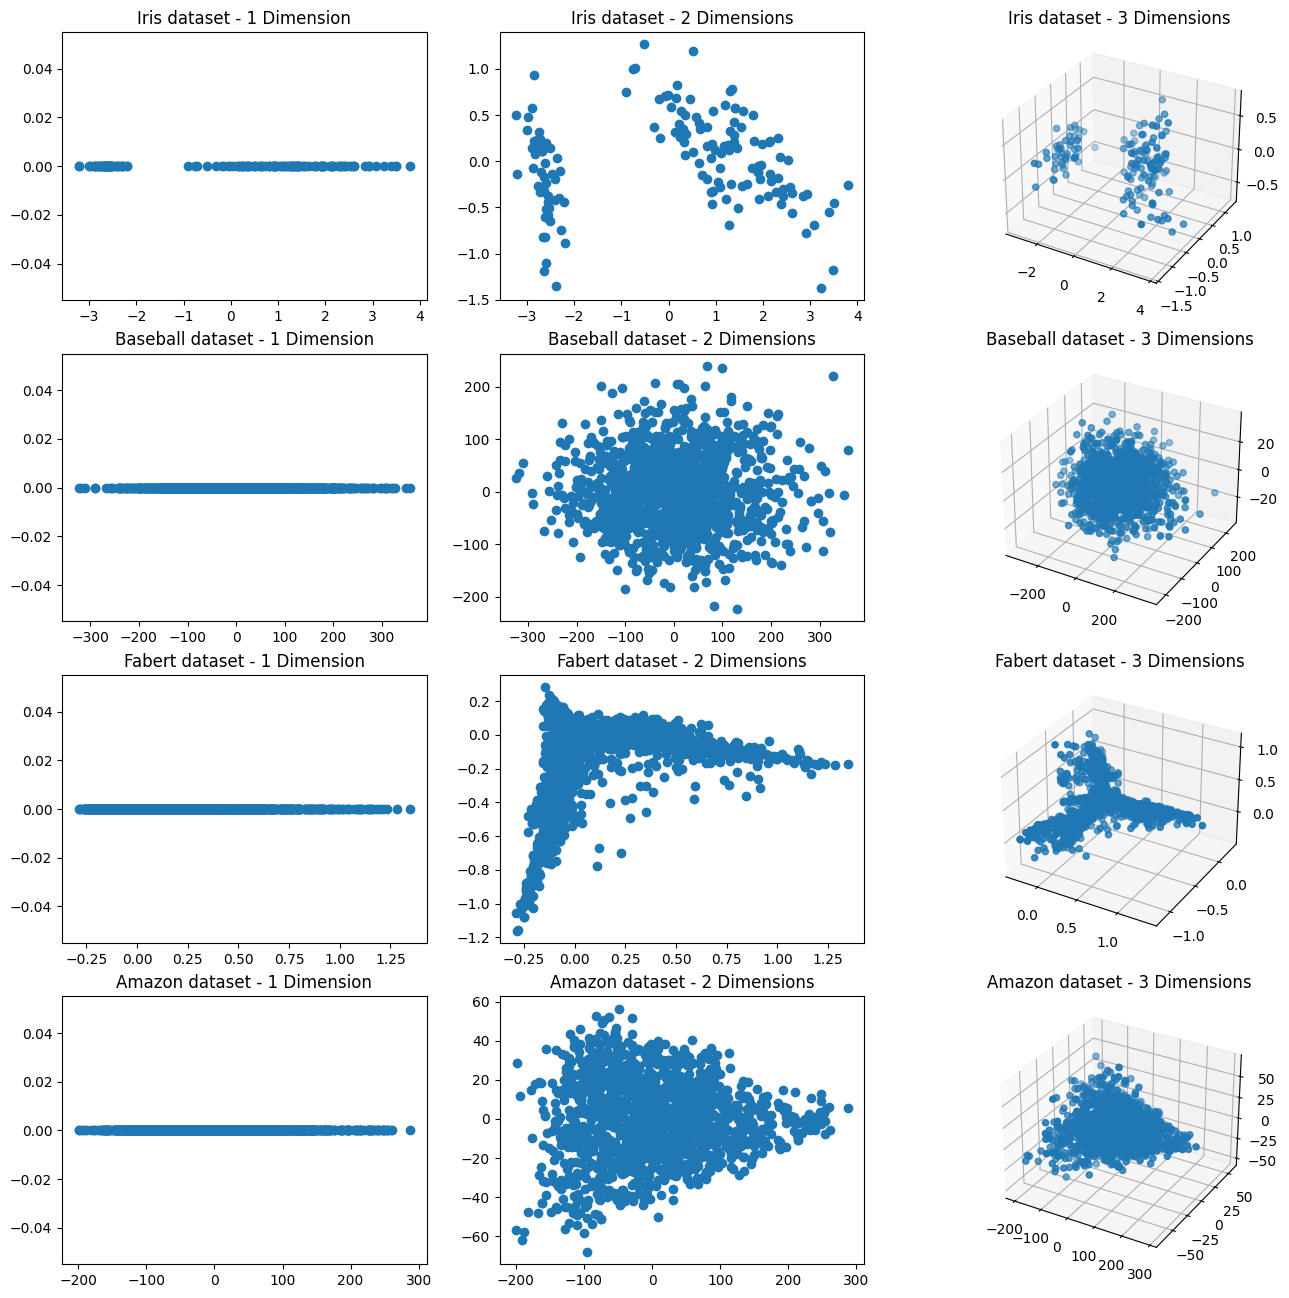

In [ ]:
iris_data = np.array([])
baseball_data = np.array([])
fabert_data = np.array([])
amazon_data = np.array([])

fig = plt.figure(figsize=plt.figaspect(1))


for i in range(3):
    reduced_iris, reduced_variance_iris, kept_percentage_iris = PCA(df_iris, i + 1)
    if iris_data.size == 0:
        iris_data = np.array(['Iris Dataset',len(reduced_iris[0]), reduced_variance_iris/kept_percentage_iris, reduced_variance_iris, kept_percentage_iris*100])
        ax = fig.add_subplot(4, 3, 1)
        ax.set_title('Iris dataset - 1 Dimension')
        ax.scatter(reduced_iris,np.zeros_like(reduced_iris))
    else: 
        iris_data = np.vstack((iris_data, ['Iris dataset',len(reduced_iris[0]), reduced_variance_iris/kept_percentage_iris, reduced_variance_iris, kept_percentage_iris*100]))
        if i == 1:
            ax = fig.add_subplot(4, 3, 2)
            ax.set_title('Iris dataset - 2 Dimensions')
            ax.scatter(reduced_iris[:,0],reduced_iris[:,1])
        else:
            ax = fig.add_subplot(4, 3, 3, projection='3d')
            ax.set_title('Iris dataset - 3 Dimensions')
            ax.scatter(reduced_iris[:,0],reduced_iris[:,1],reduced_iris[:,2])

    reduced_baseball_numeric, reduced_variance_baseball_numeric, kept_percentage_numeric = PCA(df_baseball_numeric, i + 1)
    if baseball_data.size == 0:
        baseball_data = np.array(['Baseball Dataset',len(reduced_baseball_numeric[0]), reduced_variance_baseball_numeric/kept_percentage_numeric, reduced_variance_baseball_numeric, kept_percentage_numeric*100])        
        ax = fig.add_subplot(4, 3, 4)
        ax.set_title('Baseball dataset - 1 Dimension')
        ax.scatter(reduced_baseball_numeric,np.zeros_like(reduced_baseball_numeric))
    else:
        baseball_data = np.vstack((baseball_data, ['Baseball Dataset',len(reduced_baseball_numeric[0]), reduced_variance_baseball_numeric/kept_percentage_numeric, reduced_variance_baseball_numeric, kept_percentage_numeric*100]))
        if i == 1:
            ax = fig.add_subplot(4, 3, 5)
            ax.set_title('Baseball dataset - 2 Dimensions')
            ax.scatter(reduced_baseball_numeric[:,0],reduced_baseball_numeric[:,1])
        else:
            ax = fig.add_subplot(4, 3, 6, projection='3d')
            ax.set_title('Baseball dataset - 3 Dimensions')
            ax.scatter(reduced_baseball_numeric[:,0],reduced_baseball_numeric[:,1],reduced_baseball_numeric[:,2])

    reduced_fabert, reduced_variance_fabert, kept_percentage_fabert = PCA(df_fabert, i + 1)
    if fabert_data.size == 0:
        fabert_data = np.array(['Fabert dataset',len(reduced_fabert[0]), reduced_variance_fabert/kept_percentage_fabert, reduced_variance_fabert, kept_percentage_fabert*100])
        ax = fig.add_subplot(4, 3, 7)
        ax.set_title('Fabert dataset - 1 Dimension')
        ax.scatter(reduced_fabert,np.zeros_like(reduced_fabert))
    else:
        fabert_data = np.vstack((fabert_data, ['Fabert dataset',len(reduced_fabert[0]), reduced_variance_fabert/kept_percentage_fabert, reduced_variance_fabert, kept_percentage_fabert*100]))
        if i == 1:
            ax = fig.add_subplot(4, 3, 8)
            ax.set_title('Fabert dataset - 2 Dimensions')
            ax.scatter(reduced_fabert[:,0],reduced_fabert[:,1])
        else:
            ax = fig.add_subplot(4, 3, 9, projection='3d')
            ax.set_title('Fabert dataset - 3 Dimensions')
            ax.scatter(reduced_fabert[:,0],reduced_fabert[:,1],reduced_fabert[:,2])

    reduced_amazon, reduced_variance_amazon, kept_percentage_amazon = PCA(df_amazon, i + 1)
    if amazon_data.size == 0:
        amazon_data = np.array(['Amazon dataset',len(reduced_amazon[0]), reduced_variance_amazon/kept_percentage_amazon, reduced_variance_amazon, kept_percentage_amazon*100])
        ax = fig.add_subplot(4, 3, 10)
        ax.set_title('Amazon dataset - 1 Dimension')
        ax.scatter(reduced_amazon,np.zeros_like(reduced_amazon))
    else:
        amazon_data = np.vstack((amazon_data, ['Amazon dataset',len(reduced_amazon[0]), reduced_variance_amazon/kept_percentage_amazon, reduced_variance_amazon, kept_percentage_amazon*100]))
        if i == 1:
            ax = fig.add_subplot(4, 3, 11)
            ax.set_title('Amazon dataset - 2 Dimensions')
            ax.scatter(reduced_amazon[:,0],reduced_amazon[:,1])
        else:
            ax = fig.add_subplot(4, 3, 12, projection='3d')
            ax.set_title('Amazon dataset - 3 Dimensions')
            ax.scatter(reduced_amazon[:,0],reduced_amazon[:,1],reduced_amazon[:,2])


plt.rcParams["figure.figsize"] = (14,30)        
plt.savefig('plot.png')    
plt.show()  

In [ ]:
data = np.vstack((iris_data,baseball_data,fabert_data,amazon_data))

df = pd.DataFrame(data=data.real, columns=['Dataset','Número de columnas', 'Varianza original', 'Varianza reducida', 'Porcentaje mantenido'])
df

,Dataset,Número de columnas,Varianza original,Varianza reducida,Porcentaje mantenido
0,Iris Dataset,1,4.569291275167783,4.224840768320111,92.46162071742681
1,Iris dataset,2,4.569291275167783,4.467084339947626,97.76317750248032
2,Iris dataset,3,4.569291275167783,4.545608248041781,99.481691454981
3,Baseball Dataset,1,17412.91996725617,11828.850399240404,67.93145791448974
4,Baseball Dataset,2,17412.91996725617,17228.155685720725,98.9389241902973
5,Baseball Dataset,3,17412.91996725617,17391.760997902402,99.87848695455124
6,Fabert dataset,1,2.7866225874136514,0.024487232807624448,0.8787423499050795
7,Fabert dataset,2,2.7866225874136514,0.04658468729029276,1.6717257478892904
8,Fabert dataset,3,2.7866225874136514,0.06404331174708347,2.2982413203836116
9,Amazon dataset,1,13503.860974872168,7324.482869910421,54.23991615094184


## Point #3


In [3]:
df_cats = pd.read_csv("noisy_cats.csv")
df_cats

,a,b,y
0,46.52,male,True
1,4.77,male,True
2,91.45,male,True
3,50.85,male,True
4,23.73,male,True
...,...,...,...
95,89.80,female,False
96,46.24,female,False
97,38.11,female,False
98,7.74,female,False


### Item A

In [4]:
y_encoded = pd.get_dummies(df_cats["b"], prefix="b", dtype=float)
df_encoded = pd.concat([df_cats, y_encoded], axis=1)
df_encoded = df_encoded.drop("b", axis=1)

print(df_encoded)

        a      y  b_female  b_male
0   46.52   True       0.0     1.0
1    4.77   True       0.0     1.0
2   91.45   True       0.0     1.0
3   50.85   True       0.0     1.0
4   23.73   True       0.0     1.0
..    ...    ...       ...     ...
95  89.80  False       1.0     0.0
96  46.24  False       1.0     0.0
97  38.11  False       1.0     0.0
98   7.74  False       1.0     0.0
99  83.19  False       1.0     0.0

[100 rows x 4 columns]


### Item B


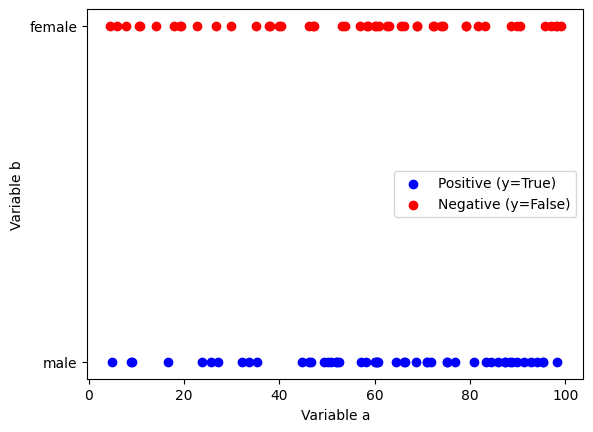

In [5]:
positive_points = df_cats[df_cats['y'] == 1]
negative_points = df_cats[df_cats['y'] == 0]

plt.scatter(positive_points['a'], positive_points['b'], c='blue', label='Positive (y=True)')
plt.scatter(negative_points['a'], negative_points['b'], c='red', label='Negative (y=False)')
plt.xlabel('Variable a')
plt.ylabel('Variable b')
plt.legend()

plt.show()

Yes, you could separate them byt just drawing a line down the middle

### Item C

In [6]:
pca_result, reduced_variance_encoded, kept_percentage_encoded = PCA(df_encoded,1)

plt.scatter(pca_result, np.zeros_like(pca_result), c=df_encoded['y'], cmap='coolwarm')
plt.xlabel('Synthetic Value')
plt.ylabel('PCA Dimension')
plt.show()

NameError: name 'PCA' is not defined

Not anymore.

### Item D

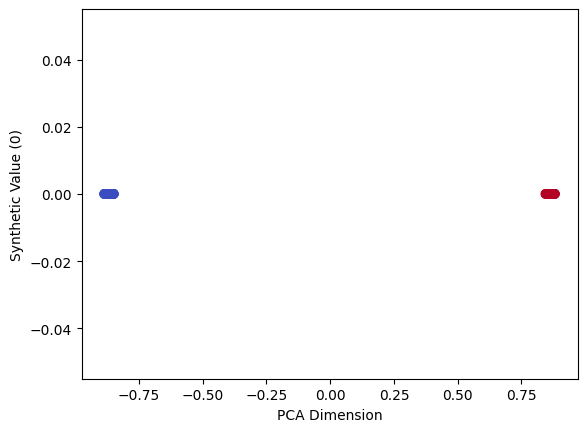

In [ ]:
a_coefficient = 0.01
b_coefficient = 0
df_transformed = pd.DataFrame.copy(df_encoded)
df_transformed['a_transformed'] = a_coefficient * df_transformed['a'] + b_coefficient
df_transformed = df_transformed.drop('a', axis=1)

pca_result, reduced_variance_encoded, kept_percentage_encoded = PCA(df_transformed,1)

plt.scatter(pca_result, np.zeros_like(pca_result), c=df_encoded['y'], cmap='coolwarm')
plt.xlabel('PCA Dimension')
plt.ylabel('Synthetic Value (0)')
plt.show()

Yes, they are separable

### Item E

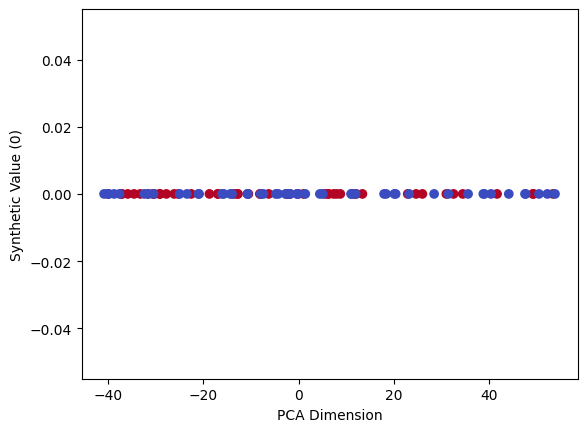

In [ ]:
mean_a = df_cats['a'].mean()
std_a = df_cats['a'].std()
mean_y = df_cats['y'].mean()
std_y = df_cats['y'].std()

df_standardized = pd.DataFrame.copy(df_encoded)
df_standardized['a_standardized'] = (df_standardized['a'] - mean_a) / std_a
df_standardized['y_standardized'] = (df_standardized['y'] - mean_y) / std_y

pca_result, reduced_variance_encoded, kept_percentage_encoded = PCA(df_standardized,1)

plt.scatter(pca_result, np.zeros_like(pca_result), c=df_cats['y'], cmap='coolwarm')
plt.xlabel('PCA Dimension')
plt.ylabel('Synthetic Value (0)')
plt.show()

It isn't possible anymore to sepparate them